#Task:

**To develop the machine learning approach to forecast the demand of car rental**

ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 




#Data Information:



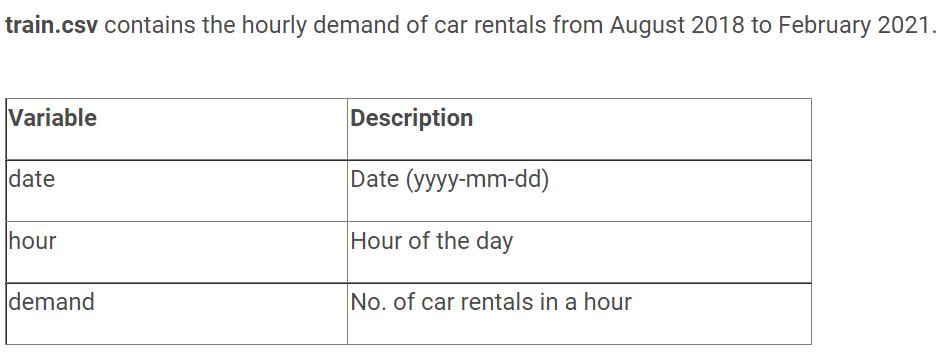


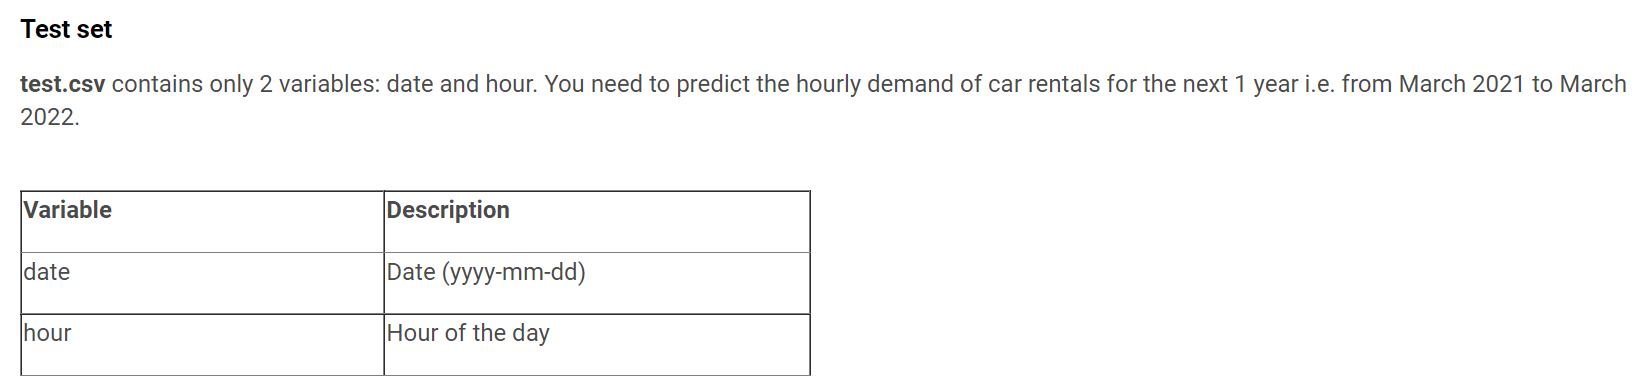

# **Lets import few necessary Packages**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from scipy.stats import ks_2samp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import MLPRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

import xgboost
import lightgbm as lgb

ImportError: ignored

In [ ]:
train = pd.read_csv("train.csv")
train.head(5)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
test = pd.read_csv("test.csv")
test.head(5)

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
ks_2samp(train['hour'], test['hour'])

KstestResult(statistic=0.01161028171521436, pvalue=0.45828499627777664)

The p-value of 0.4616 indicates distributions are same

## **Lets create Visulalization Report leveraging Pandas Profiling Library**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#using profiling library to initiate data cleaning and get an overview
# Generate the profile report
report = ProfileReport(train)
print(str(report.report))
report.to_notebook_iframe()

report.to_file("train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report = ProfileReport(test)
print(str(report.report))
report.to_notebook_iframe()

report.to_file("test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **'The above Profiling report explains everything about the training data and test data and we can infer and utilize a lot from that'.**

In [ ]:
train.shape

(18247, 3)

In [ ]:
test.shape

(7650, 2)

**checking for null values**

In [ ]:
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [ ]:
test.isnull().sum()

date    0
hour    0
dtype: int64

In [ ]:
train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


Here we will be extracting date into 3 new features as day , month and year

In [ ]:
# convert date_time column to datetime type
train['date'] = pd.to_datetime(train['date'])

In [ ]:
#Month
# extract month feature
months = train.date.dt.month
months

0        8
1        8
2        8
3        8
4        8
        ..
18242    2
18243    2
18244    2
18245    2
18246    2
Name: date, Length: 18247, dtype: int64

In [ ]:
# extract day of month feature
day_of_months = train.date.dt.day
day_of_months

0        18
1        18
2        18
3        18
4        18
         ..
18242    28
18243    28
18244    28
18245    28
18246    28
Name: date, Length: 18247, dtype: int64

In [ ]:
year = train.date.dt.year
year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
18242    2021
18243    2021
18244    2021
18245    2021
18246    2021
Name: date, Length: 18247, dtype: int64

In [ ]:
# first: extract the day name literal
to_one_hot = train.date.dt.day_name()
# second: one hot encode to 7 columns
days = pd.get_dummies(to_one_hot)
#display data
days

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
18242,0,0,0,1,0,0,0
18243,0,0,0,1,0,0,0
18244,0,0,0,1,0,0,0
18245,0,0,0,1,0,0,0


In [ ]:
# daypart function
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"
# utilize it along with apply method
raw_dayparts = train['hour'].apply(daypart)
# one hot encoding
dayparts = pd.get_dummies(raw_dayparts)
# re-arrange columns for convenience
dayparts = dayparts[['dawn','morning','noon','afternoon','evening','midnight']]
#display data
dayparts

,dawn,morning,noon,afternoon,evening,midnight
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
18242,0,0,0,0,1,0
18243,0,0,0,0,1,0
18244,0,0,0,0,1,0
18245,0,0,0,0,0,1


In [ ]:
features = pd.DataFrame({
    'month' : months,
    'day_of_month' : day_of_months,
    'year' : year
})


#second step: concat with one-hot encode typed features
features = pd.concat([features, days, dayparts], axis = 1)

In [ ]:
train.shape

(18247, 3)

In [ ]:
train = train.drop('date' ,axis=1)

In [ ]:
train.shape

(18247, 2)

In [ ]:
train = pd.concat([train , features] ,axis=1)

In [ ]:
train.shape

(18247, 18)

In [ ]:
train.head(5)

,hour,demand,month,day_of_month,year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dawn,morning,noon,afternoon,evening,midnight
0,9,91,8,18,2018,0,0,1,0,0,0,0,0,1,0,0,0,0
1,10,21,8,18,2018,0,0,1,0,0,0,0,0,0,1,0,0,0
2,13,23,8,18,2018,0,0,1,0,0,0,0,0,0,1,0,0,0
3,14,104,8,18,2018,0,0,1,0,0,0,0,0,0,0,1,0,0
4,15,81,8,18,2018,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
Y = train['demand']
train = train.drop('demand',axis=1)
train.head(2)

,hour,month,day_of_month,year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dawn,morning,noon,afternoon,evening,midnight
0,9,8,18,2018,0,0,1,0,0,0,0,0,1,0,0,0,0
1,10,8,18,2018,0,0,1,0,0,0,0,0,0,1,0,0,0


# **Feature Scaling**

we need to scale the variables for better interpretability. we will only  scale the numeric columns . Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [ ]:
feature_to_standardize = train.iloc[:,0:4]
feature_to_standardize.shape

(18247, 4)

In [ ]:
from sklearn import preprocessing 
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
X_train_after_Standardisation = Standardisation.fit_transform(feature_to_standardize)

In [ ]:
X_train_after_Standardisation = pd.DataFrame(X_train_after_Standardisation, 
                                             columns =['hour','month','day_of_month','year'])

In [ ]:
X = pd.concat([X_train_after_Standardisation , train.iloc[:,4:17]],axis=1 )

In [ ]:
X.head(5)

,hour,month,day_of_month,year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dawn,morning,noon,afternoon,evening,midnight
0,-0.552307,0.422786,0.252782,-1.722653,0,0,1,0,0,0,0,0,1,0,0,0,0
1,-0.399514,0.422786,0.252782,-1.722653,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.058867,0.422786,0.252782,-1.722653,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.211660,0.422786,0.252782,-1.722653,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.364453,0.422786,0.252782,-1.722653,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(18247, 17)

##Splitting into training and testing part 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16422, 17)
(16422,)
(1825, 17)
(1825,)


#**Handling Test Data**

In [ ]:
test = pd.read_csv("test.csv")
test.head(5)

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
# convert date_time column to datetime type
test['date'] = pd.to_datetime(test['date'])

In [ ]:
#Month
# extract month feature
months_test = test.date.dt.month
months_test

0       3
1       3
2       3
3       3
4       3
       ..
7645    3
7646    3
7647    3
7648    3
7649    3
Name: date, Length: 7650, dtype: int64

In [ ]:
# extract day of month feature
day_of_months_test = test.date.dt.day
day_of_months_test

0        1
1        1
2        1
3        1
4        1
        ..
7645    28
7646    28
7647    28
7648    28
7649    28
Name: date, Length: 7650, dtype: int64

In [ ]:
year_test = test.date.dt.year
year_test

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
7645    2022
7646    2022
7647    2022
7648    2022
7649    2022
Name: date, Length: 7650, dtype: int64

In [ ]:
# first: extract the day name literal
to_one_hot_test = test.date.dt.day_name()
# second: one hot encode to 7 columns
days_test = pd.get_dummies(to_one_hot_test)
#display data
days_test

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
7645,0,1,0,0,0,0,0
7646,0,1,0,0,0,0,0
7647,0,1,0,0,0,0,0
7648,0,1,0,0,0,0,0


In [ ]:
# daypart function
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"
# utilize it along with apply method
raw_dayparts_test = test['hour'].apply(daypart)
# one hot encoding
dayparts_test = pd.get_dummies(raw_dayparts_test)
# re-arrange columns for convenience
dayparts_test = dayparts_test[['dawn','morning','noon','afternoon','evening','midnight']]
#display data
dayparts_test

,dawn,morning,noon,afternoon,evening,midnight
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
7645,0,0,0,0,1,0
7646,0,0,0,0,1,0
7647,0,0,0,0,1,0
7648,0,0,0,0,0,1


In [ ]:
features_test = pd.DataFrame({
    'month' : months_test,
    'day_of_month' : day_of_months_test,
    'year' : year_test
})


#second step: concat with one-hot encode typed features
features_test = pd.concat([features_test, days_test, dayparts_test], axis = 1)

In [ ]:
test.shape

(7650, 2)

In [ ]:
test = test.drop('date' ,axis=1)

In [ ]:
test.shape

(7650, 1)

In [ ]:
test = pd.concat([test , features_test] ,axis=1)

In [ ]:
test.shape

(7650, 17)

In [ ]:
test.head(5)

,hour,month,day_of_month,year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dawn,morning,noon,afternoon,evening,midnight
0,0,3,1,2021,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,3,1,2021,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,3,1,2021,0,1,0,0,0,0,0,1,0,0,0,0,0
3,3,3,1,2021,0,1,0,0,0,0,0,1,0,0,0,0,0
4,5,3,1,2021,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
feature_to_standardize_test = test.iloc[:,0:4]
feature_to_standardize_test.shape

(7650, 4)

In [ ]:
from sklearn import preprocessing 
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
X_test_after_Standardisation = Standardisation.fit_transform(feature_to_standardize_test)

In [ ]:
X_test_after_Standardisation = pd.DataFrame(X_test_after_Standardisation, 
                                             columns =['hour','month','day_of_month','year'])

In [ ]:
final_test = pd.concat([X_test_after_Standardisation , test.iloc[:,4:17]],axis=1 )

In [ ]:
final_test.head(5)

,hour,month,day_of_month,year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dawn,morning,noon,afternoon,evening,midnight
0,-1.894144,-0.872238,-1.676677,-0.561549,0,1,0,0,0,0,0,0,0,0,0,0,1
1,-1.743085,-0.872238,-1.676677,-0.561549,0,1,0,0,0,0,0,0,0,0,0,0,1
2,-1.592025,-0.872238,-1.676677,-0.561549,0,1,0,0,0,0,0,1,0,0,0,0,0
3,-1.440966,-0.872238,-1.676677,-0.561549,0,1,0,0,0,0,0,1,0,0,0,0,0
4,-1.138848,-0.872238,-1.676677,-0.561549,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_test.shape

(7650, 17)

#**Model Training**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X,Y)
y_train_pred = lr.predict(X)
y_test_pred = lr.predict(final_test)
print(mean_squared_error(y_true=Y,y_pred=np.round(y_train_pred),squared=False))

38.32868968405216


In [ ]:
y_test_pred_lr = np.round(y_test_pred)

In [ ]:
y_test_pred_lr = pd.DataFrame(y_test_pred_lr , columns = ['demand'])

In [ ]:
temp_test = pd.read_csv("test.csv")

In [ ]:
y_test_pred_lr = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_lr],axis=1)

In [ ]:
y_test_pred_lr.to_csv("lr.csv",index=False)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,Y)
y_train_pred = rf.predict(X)
y_test_pred = rf.predict(final_test)
print(mean_squared_error(Y,np.round(y_train_pred),squared=False))

12.319514114426925


In [ ]:
y_test_pred_rf = np.round(y_test_pred)
y_test_pred_rf = pd.DataFrame(y_test_pred_rf , columns = ['demand'])
y_test_pred_rf = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_rf],axis=1)
#y_test_pred_rf.to_csv("rf.csv",index=False)

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(criterion='mse')


hyp_para = {"learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],"n_estimators" : [5,10,50, 75, 100],"max_depth":[3,4,5,6,7]}

gb_model = RandomizedSearchCV(gb_model, hyp_para, random_state=0)


gb_model.fit(X,Y)
y_train_pred = gb_model.predict(X)
y_test_pred = gb_model.predict(final_test)
print(mean_squared_error(Y,np.round(y_train_pred),squared=False))
#print(r2_score(y_test,y_test_pred))

33.205256034751855


In [ ]:
gb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}

In [ ]:
y_test_pred_gbdt = np.round(y_test_pred)

In [ ]:
y_test_pred_gbdt = pd.DataFrame(y_test_pred_gbdt , columns = ['demand'])

In [ ]:
temp_test = pd.read_csv("test.csv")

In [ ]:
y_test_pred_gbdt = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_gbdt],axis=1)

In [ ]:
y_test_pred_gbdt.to_csv("gbdt1.csv",index=False)

XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(X,Y)
y_train_pred = xgb.predict(X)
y_test_pred = xgb.predict(final_test)
print(mean_squared_error(Y,np.round(y_train_pred),squared=False))
#print(r2_score(y_test,y_test_pred))

[13:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
28.306405449416598


In [ ]:
y_test_pred_xgb = np.round(y_test_pred)
y_test_pred_xgb = pd.DataFrame(y_test_pred_xgb , columns = ['demand'])
y_test_pred_xgb = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_xgb],axis=1)
y_test_pred_xgb.to_csv("xgb.csv",index=False)

In [ ]:
import sklearn.base as skb
class MixModel(skb.BaseEstimator,skb.RegressorMixin,skb.TransformerMixin):
    def __init__(self,algs):
        self.algs = algs
    def fit(self,X,y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        for alg in self.algs_:
            alg.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return np.mean(predictions,axis=1)

In [ ]:
## Using mixed model of random forest, gradient boosting and XGB Regressor
mixed_model = MixModel(algs = [xgb,rf,gb_model])
mixed_model.fit(X, Y)
y_train_pred = mixed_model.predict(X)
y_test_pred = mixed_model.predict(final_test)
print(mean_squared_error(Y,np.round(y_train_pred),squared=False))
#print(r2_score(y_test,y_test_pred))

In [ ]:
y_test_pred_mixed = np.round(y_test_pred)
y_test_pred_mixed = pd.DataFrame(y_test_pred_mixed , columns = ['demand'])
y_test_pred_mixed = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_mixed],axis=1)
y_test_pred_mixed.to_csv("mixed.csv",index=False)

# **StackingRegressor**

In [ ]:
estimators = [
              ('xgb', xgboost.XGBRegressor(nthread=-1, learning_rate=0.2285260448662222, max_depth=3, n_estimators=2000)),
              ('mlp', MLPRegressor()),
              ('ada', AdaBoostRegressor()),
              ('gbr', GradientBoostingRegressor())]


stacking_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
stacking_model.fit(X, Y)

In [ ]:
train_pred_stacking = stacking_model.predict(X)
#test_pred_stacking = stacking_model.predict(final_test)
stacking_main_pred = stacking_model.predict(final_test)
#print(mean_squared_error(Y,np.round(stacking_main_pred),squared=False))

In [ ]:
y_test_pred_stack = np.round(stacking_main_pred)
y_test_pred_stack = pd.DataFrame(y_test_pred_stack , columns = ['demand'])
y_test_pred_stack = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_stack],axis=1)
y_test_pred_stack.to_csv("stack.csv",index=False)

# **Catboost Regressor**

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#build model
cat_model = CatBoostRegressor(loss_function='RMSE')


param_dist = { "learning_rate": np.linspace(0,0.2,7),
               "max_depth": randint(3, 10)}
               
#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cat_model , param_dist, scoring='accuracy', cv =5)

# Fit model 
rscv.fit(X, Y,plot=True)

train_pred_cat = rscv.predict(X)
print(rscv.best_params_)
print(rscv.best_score_)

cat_main_pred = rscv.predict(final_test)

In [ ]:
#best model
cat_model = CatBoostRegressor(loss_function='RMSE',learning_rate=0.2,max_depth=6)

# Fit model 
cat_model.fit(X, Y,plot=True)

train_pred_cat = cat_model.predict(X)
cat_main_pred = cat_model.predict(final_test)


In [ ]:
y_test_pred_cat = np.round(cat_main_pred)
y_test_pred_cat = pd.DataFrame(y_test_pred_cat , columns = ['demand'])
y_test_pred_cat = pd.concat([temp_test['date'] ,temp_test['hour'], y_test_pred_cat],axis=1)
y_test_pred_cat.to_csv("cat2.csv",index=False)

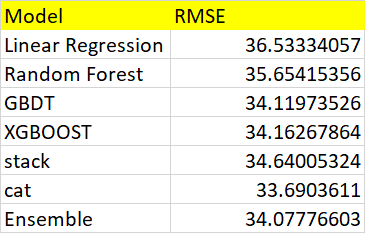

**Cat Boost Regressor is the clear winner and has performed the best with learning rate of 0.1 and max_depth of 6.**